In [3]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

## Configure plot appearance

In [4]:
sns.set('paper', 'white', 'colorblind', font_scale=2.2,
        rc={'lines.linewidth': 2,
            'figure.figsize': (12.0, 10.0),
            'image.interpolation': 'nearest',
            'image.cmap': 'gray',
            'text.usetex' : True,
            }
        )

## Base class for Gaussian mixture

In [5]:
class GaussianMixture1D:
    def __init__(self, mixture_probs, means, stds):
        self.num_mixtures = len(mixture_probs)
        self.mixture_probs = mixture_probs
        self.means = means
        self.stds = stds

    def sample(self, num_samples=1):
        mixture_ids = np.random.choice(self.num_mixtures, size=num_samples, p=self.mixture_probs)
        result = np.zeros([num_samples])
        for sample_idx in range(num_samples):
            result[sample_idx] = np.random.normal(
                loc=self.means[mixture_ids[sample_idx]],
                scale=self.stds[mixture_ids[sample_idx]]
            )
        return result

    def logpdf(self, samples):
        try:
            nb_samples = len(samples)
        except:
            nb_samples = 1
        mixture_logpdfs = np.zeros([nb_samples, self.num_mixtures])
        for mixture_idx in range(self.num_mixtures):
            mixture_logpdfs[:, mixture_idx] = scipy.stats.norm.logpdf(
                samples,
                loc=self.means[mixture_idx],
                scale=self.stds[mixture_idx]
            )
        return sp.special.logsumexp(mixture_logpdfs + np.log(self.mixture_probs), axis=1)

    def pdf(self, samples):
        return np.exp(self.logpdf(samples))


## Utility functions

In [6]:
def approx_kl(gmm_1, gmm_2, xs):
    ys = gmm_1.pdf(xs) * (gmm_1.logpdf(xs) - gmm_2.logpdf(xs))
    return np.trapz(ys, xs)


def minimize_pq(p, xs, q_means, q_stds):
    q_mean_best = None
    q_std_best = None
    kl_best = np.inf
    for q_mean in q_means:
        for q_std in q_stds:
            q = GaussianMixture1D(np.array([1]), np.array([q_mean]), np.array([q_std]))
            kl = approx_kl(p, q, xs)
            if kl < kl_best:
                kl_best = kl
                q_mean_best = q_mean
                q_std_best = q_std

    q_best = GaussianMixture1D(np.array([1]), np.array([q_mean_best]), np.array([q_std_best]))
    return q_best, kl_best


def minimize_qp(p, xs, q_means, q_stds):
    q_mean_best = None
    q_std_best = None
    kl_best = np.inf
    for q_mean in q_means:
        for q_std in q_stds:
            q = GaussianMixture1D(np.array([1]), np.array([q_mean]), np.array([q_std]))
            kl = approx_kl(q, p, xs)
            if kl < kl_best:
                kl_best = kl
                q_mean_best = q_mean
                q_std_best = q_std

    q_best = GaussianMixture1D(np.array([1]), np.array([q_mean_best]), np.array([q_std_best]))
    return q_best, kl_best

## Configure what to plot

In [7]:
p_second_means_min = 0
p_second_means_max = 10
num_p_second_means = 3
p_second_mean_list = np.linspace(p_second_means_min, p_second_means_max, num_p_second_means)
# p_second_mean_list = np.array([0, ])

## Plot curves

[Text(0, 0, '$\\mathbf{w}^*_1$'), Text(0, 0, '$\\mathbf{w}^*_2$')]

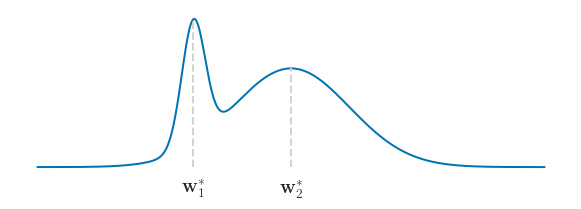

In [28]:
p_mixture_probs = np.array([0.2, 0.8])
p_means = np.array([0, 2.5])
p_stds = np.array([0.3, 1.5])
p = GaussianMixture1D(p_mixture_probs, p_means, p_stds)
fig, axs = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 3)

xs_min = -4
xs_max = 9
num_plot_points = 1000
xs = np.linspace(xs_min, xs_max, num_plot_points)

axs.plot(xs, p.pdf(xs))
axs.plot(2*[p_means[0]], [0.0, p.pdf([p_means[0]])], color='lightgray', linestyle='dashed')
axs.plot(2*[p_means[1]], [0.0, p.pdf([p_means[1]])], color='lightgray', linestyle='dashed')
# axs.plot(2*[p_means[1]], [0.0, p.pdf(p_means[1])])

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_yticks([])
# axs.set_xticks([0.0, 2.5], ['$x_1$', '$x_2$'])
# axs.set_xticklabels(['$x_1$', '$x_2$'])
axs.set_xticks([0.0, 2.5])

axs.set_xticklabels(['$\mathbf{w}^*_1$', '$\mathbf{w}^*_2$'])
# fig.xticks(range(2), ['$x_1$', '$x_2$'])
# axs.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, 0))

## Save to file

In [29]:
filename = 'posterior-distribution-example.pdf'
fig.savefig( '/home/lpcinelli/repos/tese/figures/chap4/'+ filename, bbox_inches='tight', dpi=200)
print('Saved to {}'.format(filename))

Saved to posterior-distribution-example.pdf
